In [1]:
# Set up
# Following https://scikit-learn.org/stable/tutorial/basic/tutorial.html#machine-learning-the-problem-setting
from sklearn import datasets
from sklearn import svm
import numpy as np
from sklearn import kernel_approximation
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import random
random.seed(10)

/exports/applications/apps/SL7/anaconda/5.3.1/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/exports/applications/apps/SL7/anaconda/5.3.1/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated

# To create this conda environment
```conda create --prefix /exports/igmm/eddie/CCGG-tumour-WGS/BradTemp/macro_organoid_results/rf_env r-base python scikit-learn scanpy r-seurat```
 
To run jupyter notbook on here:
```pip install ipykernal```
```source activate /exports/igmm/eddie/CCGG-tumour-WGS/BradTemp/macro_organoid_results/rf_env```

Following https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/


# Loading the ground truth data

In [2]:
# Change working directory 
import os
path="/exports/igmm/eddie/CCGG-tumour-WGS/BradTemp/macro_organoid_results/benchmarking_data"
os.chdir(path)
os.getcwd()

'/gpfs/igmmfs01/eddie/CCGG-tumour-WGS/BradTemp/macro_organoid_results/benchmarking_data'

In [4]:
# Load in the ground truth data
import glob
path = '' # use your path
all_files = glob.glob(os.path.join(path , "*all_stats_annot.csv"))
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)
#print(all.head())

In [5]:
# Subset this for only the columns we want
all=all.drop(labels=["Organoid", "Mean", "StdDev", "Mode", "Median", "Min", "Max", "%Area","Skew", "Kurt", "Slice"], axis=1)
#print(all.head())

In [6]:
# Subset for only the columns that are indpendent and don't show huge correlation
all=all[["Minor", "AR", "Circ.", "Shape"]]
#print(all.head())

In [7]:
# Replace the typo
import re
all[['Shape']] = all[['Shape']].replace('buding', 'budding')

### Dividing the ground truth into training and test

In [8]:
# Divide the data into attributes and labels
X = all.iloc[:, 0:3].values
y = all.Shape
#print(y)

In [9]:
# Divide the data into the test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

In [10]:
# Scale the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[-0.48085038 -0.78072614  0.19364873]
 [-1.09801861  5.15246413 -3.52698455]
 [-1.06991699 -0.1667177   1.0501974 ]
 ...
 [ 1.49387859 -0.61387602  0.52377687]
 [ 1.12935808 -0.47372192  0.19364873]
 [ 1.38428432 -0.38028585 -0.49337468]]


### Training the classifier

In [11]:
# Training the algorithm
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestClassifier(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

/exports/applications/apps/SL7/anaconda/5.3.1/lib/python3.7/site-packages/sklearn/ensemble/forest.py:482: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
/exports/applications/apps/SL7/anaconda/5.3.1/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.in

/exports/applications/apps/SL7/anaconda/5.3.1/lib/python3.7/site-packages/sklearn/ensemble/base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [12]:
# Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[447  12  71]
 [ 41  19  19]
 [ 97   2 176]]
             precision    recall  f1-score   support

          .       0.76      0.84      0.80       530
    budding       0.58      0.24      0.34        79
     cystic       0.66      0.64      0.65       275

avg / total       0.72      0.73      0.71       884

0.7262443438914027


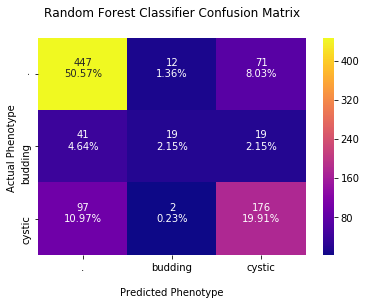

In [54]:
# Plot confusion matrix with percentages and actual counts together
import seaborn as sns
cf_matrix=confusion_matrix(y_test,y_pred)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(3,3)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='plasma')

ax.set_title('Random Forest Classifier Confusion Matrix\n');
ax.set_xlabel('\nPredicted Phenotype')
ax.set_ylabel('Actual Phenotype ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['.','budding', 'cystic'])
ax.yaxis.set_ticklabels(['.','budding', 'cystic'])

## Display the visualization of the Confusion Matrix.
plt.show()

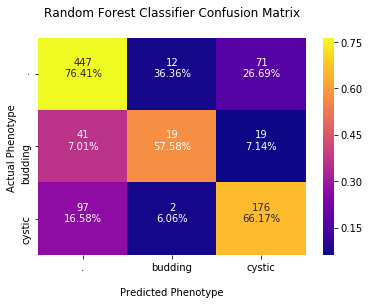

In [144]:
# Displayig the confusion matrix - calculating and colouring by the % in the columns
import seaborn as sns
cf_matrix=confusion_matrix(y_test,y_pred)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

c0=cf_matrix.T[0]/np.sum(cf_matrix.T[0])
c1=cf_matrix.T[1]/np.sum(cf_matrix.T[1])
c2=cf_matrix.T[2]/np.sum(cf_matrix.T[2])

group_percentages1=np.concatenate((c0, c1, c2), axis=0)

group_percentages = ["{0:.2%}".format(value) for value in
                     group_percentages1]
group_perc_matrix=np.asarray(group_percentages).reshape(3,3)
group_perc_matrix=group_perc_matrix.T



group_perc_cor=group_perc_matrix.flatten()                                

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_perc_cor)]

labels = np.asarray(labels).reshape(3,3)

per_matrix=np.asarray(group_percentages1.flatten()).reshape(3,3)

ax = sns.heatmap(per_matrix, annot=labels, fmt='', cmap='plasma')

ax.set_title('Random Forest Classifier Confusion Matrix\n');
ax.set_xlabel('\nPredicted Phenotype')
ax.set_ylabel('Actual Phenotype ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['.','budding', 'cystic'])
ax.yaxis.set_ticklabels(['.','budding', 'cystic'])

## Display the visualization of the Confusion Matrix.
plt.show()

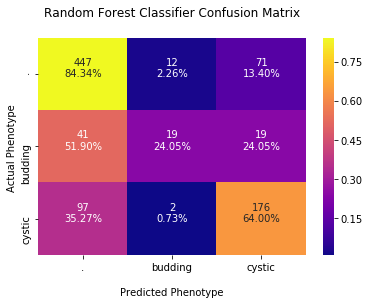

In [151]:
# Displayig the confusion matrix - calculating and colouring by the % in the rows
import seaborn as sns
cf_matrix=confusion_matrix(y_test,y_pred)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

c0=cf_matrix[0]/np.sum(cf_matrix[0])
c1=cf_matrix[1]/np.sum(cf_matrix[1])
c2=cf_matrix[2]/np.sum(cf_matrix[2])

group_percentages1=np.concatenate((c0, c1, c2), axis=0)

group_percentages = ["{0:.2%}".format(value) for value in
                     group_percentages1]
group_perc_matrix=np.asarray(group_percentages).reshape(3,3)
group_perc_cor=group_perc_matrix.flatten()                                

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_perc_cor)]

labels = np.asarray(labels).reshape(3,3)

per_matrix=np.asarray(group_percentages1.flatten()).reshape(3,3)

ax = sns.heatmap(per_matrix, annot=labels, fmt='', cmap='plasma')

ax.set_title('Random Forest Classifier Confusion Matrix\n');
ax.set_xlabel('\nPredicted Phenotype')
ax.set_ylabel('Actual Phenotype ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['.','budding', 'cystic'])
ax.yaxis.set_ticklabels(['.','budding', 'cystic'])

## Display the visualization of the Confusion Matrix.
plt.show()

[[ 19  19]
 [  2 176]]
[[0.9047619 0.0974359]
 [0.0952381 0.9025641]]


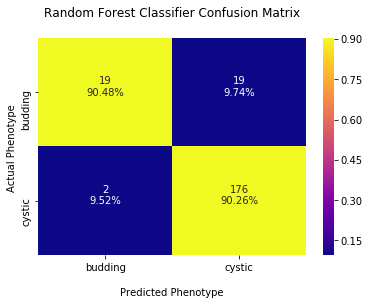

In [165]:
# Displayig the confusion matrix - calculating and colouring by the % in the cols and without the '.' class
import seaborn as sns
cf_matrix=confusion_matrix(y_test,y_pred)

cf_matrix=np.delete(cf_matrix, 0, axis=0)
cf_matrix=np.delete(cf_matrix, 0, axis=1)
print(cf_matrix)

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

c0=cf_matrix.T[0]/np.sum(cf_matrix.T[0])
c1=cf_matrix.T[1]/np.sum(cf_matrix.T[1])

group_percentages1=np.concatenate((c0, c1), axis=0)
per_matrix=np.asarray(group_percentages1.flatten()).reshape(2,2)
per_matrix=per_matrix.T
group_percentages1=per_matrix.flatten()
print(per_matrix)

group_percentages = ["{0:.2%}".format(value) for value in
                     group_percentages1]
group_perc_matrix=np.asarray(group_percentages).reshape(2,2)
group_perc_cor=group_perc_matrix.flatten()                                

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_perc_cor)]

labels = np.asarray(labels).reshape(2,2)

per_matrix=np.asarray(group_percentages1.flatten()).reshape(2,2)

ax = sns.heatmap(per_matrix, annot=labels, fmt='', cmap='plasma')

ax.set_title('Random Forest Classifier Confusion Matrix\n');
ax.set_xlabel('\nPredicted Phenotype')
ax.set_ylabel('Actual Phenotype ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['budding', 'cystic'])
ax.yaxis.set_ticklabels(['budding', 'cystic'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### Although not uper satisfied with these values, will try running on the rest and see if it is concordant with what we see using the linear regression model (although also incorrect)

# Running the classifier on the rest of the data

In [223]:
# Change directory
path="/exports/igmm/eddie/CCGG-tumour-WGS/BradTemp/macro_organoid_results/data_all_vars"
os.chdir(path)
os.getcwd()

'/gpfs/igmmfs01/eddie/CCGG-tumour-WGS/BradTemp/macro_organoid_results/data_all_vars'

In [224]:
# Load the data
path = '' # use your path
all_files = glob.glob(os.path.join(path , "*.csv"))
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

rest = pd.concat(li, axis=0, ignore_index=True)

In [225]:
# Subset this for only the columns we want
rest=rest[["Minor", "AR", "Circ."]]
print(rest.head())

    Minor     AR  Circ.
0  34.535  1.288  0.949
1  43.936  1.274  0.922
2  35.224  1.197  0.930
3  83.566  1.136  0.858
4  38.484  1.320  0.888


In [226]:
# Convert
X_rest = rest.iloc[:, 0:3].values
print(X_rest)

[[ 34.535   1.288   0.949]
 [ 43.936   1.274   0.922]
 [ 35.224   1.197   0.93 ]
 ...
 [ 40.605   1.597   0.81 ]
 [126.08    1.703   0.493]
 [ 74.054   1.635   0.653]]


In [227]:
# Scale before running
X_rest = sc.transform(X_rest)
print(X_rest)

[[-0.95451355 -0.13001067  1.27325695]
 [-0.76153814 -0.17672871  1.03235264]
 [-0.94037037 -0.43367789  1.1037317 ]
 ...
 [-0.82991396  0.90112307  0.03304586]
 [ 0.92464117  1.25484532 -2.79534923]
 [-0.1433025   1.02792916 -1.36776811]]


In [228]:
# Run the classifier over the remainder of the data
all_pred = regressor.predict(X_rest)

/exports/applications/apps/SL7/anaconda/5.3.1/lib/python3.7/site-packages/sklearn/ensemble/base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [230]:
print(all_pred)
unique, counts = np.unique(all_pred, return_counts=True)
print(dict(zip(unique, counts)))
print(type(all_pred))

['.' '.' '.' ... '.' '.' '.']
{'.': 145385, 'budding': 4369, 'cystic': 47477}
<class 'numpy.ndarray'>


In [ ]:
ypred.count

In [231]:
# Saving the results appended to the original dataframe
path = ''
all_files = glob.glob(os.path.join(path , "*.csv"))
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    temp = np.repeat(filename, len(df.index))
    df['image']=temp.tolist()
    li.append(df)


rest = pd.concat(li, axis=0, ignore_index=True)
rest['predicted_pheno']=all_pred.tolist()
rest.to_csv('../results/random_forrest/random_forrest_classification_results.csv')

# ---------------------------------------------------------------


# Below this section is scrap

In [70]:
# For training data, select 70% of the data
train = all.sample(frac=0.7)
train_truth = train.Shape
train_data = train.drop(labels=["Shape"], axis=1)
print(train_data.head())
valid = all.drop(train.index)
valid_truth = valid.Shape
valid_data = valid.drop(labels=["Shape"], axis=1)
print(valid.head())

          Area         X         Y        XM        YM   Perim.        BX  \
550   1942.890  3011.544  2527.002  3011.544  2527.002  185.838  2984.520   
765  17939.161  3500.716  2262.940  3500.716  2262.940  494.381  3424.821   
149   1427.429  3852.767  2101.588  3852.767  2101.588  139.872  3829.421   
522   2996.469  3631.541  2260.278  3631.541  2260.278  221.707  3598.561   
925   1580.368  1082.231  2705.766  1082.231  2705.766  147.420  1056.720   

          BY   Width  Height    ...       Feret       IntDen  RawIntDen  \
550  2503.76   64.26   49.98    ...      67.021   495436.905      87465   
765  2184.84  152.32  149.94    ...     158.230  4574485.938     807585   
149  2080.12   45.22   42.84    ...      48.834   363994.460      64260   
522  2225.30   64.26   73.78    ...      86.633   764099.483     134895   
925  2684.64   49.98   40.46    ...      52.197   402993.867      71145   

     FeretX  FeretY  FeretAngle  MinFeret     AR  Round  Solidity  
550    1254    106

In [ ]:
# Alternatively, using https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
X, y = make_classification(n_samples=707, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)

In [75]:
# Use random forrest classifier
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [72]:
# Calculate the model
clf.fit(train_data, train_truth)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [73]:
clf.predict(valid_data)

array(['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.',
       '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.',
       '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.',
       '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.',
       '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.',
       '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.',
       '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.',
       '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.',
       '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.',
       '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.',
       '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.',
       '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.',
       '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.',
       '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.